In [33]:
# import pandas as pd

# # 假设 CSV 文件已经加载
# grouped_df = pd.read_csv("1_table.csv")

# # 修改 pkid 列编号的逻辑
# def modify_pkid(pkid):
#     if 4 <= pkid <= 7:
#         return pkid + 12  # 4-7 变成 16-19
#     elif 8 <= pkid <= 19:
#         return pkid - 4  # 8-19 变成 4-15
#     else:
#         return pkid  # 其他保持不变

# # 修改 pkid 列
# grouped_df['pkid'] = grouped_df['pkid'].apply(modify_pkid)

# # 按照新的 pkid 排序（可选，根据需要）
# grouped_df = grouped_df.sort_values(by='pkid').reset_index(drop=True)

# # 检查结果
# print(grouped_df.head())

# # 保存修改后的文件
# grouped_df.to_csv("1_table_.csv", index=False)


In [34]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_columns', None)  # 显示所有列

In [35]:
file_path = '1_table_.csv'
df = pd.read_csv(file_path)
# 假设 df 是你的 DataFrame
# 首先，筛选出 'QtoSimplifyDiscardSolver' 的行
df_to_modify = df[df['method'] == 'QtoSimplifyDiscardSolver'].copy()

# 修改 depth 为 depth 除以 num_params
df_to_modify['depth'] = df_to_modify['depth'] / df_to_modify['num_params']

# 重命名 method 列为 'Segmented'
df_to_modify['method'] = 'Segmented'

# 将修改后的行添加到原 DataFrame
df = pd.concat([df, df_to_modify], ignore_index=True)




# df = df.drop(columns=['pbid'])
df = df[df['depth'] >= 20]
df = df[(df['num_params'] >= 1)]
grouped_df = df.groupby(['pkid', 'method'], as_index=False).agg({
    "depth": ["mean", "std"],
    # "culled_depth": ["mean", "std"],
    "num_params": ["mean", "std"],
})

# values = ["depth", "culled_depth"]
values = ["depth", 'num_params']
grouped_df.head()

pkid                    method  depth      num_params     
                                   mean  std       mean  std
0    0               ChocoSolver  507.0  0.0       10.0  0.0
1    0                 HeaSolver   46.0  0.0       90.0  0.0
2    0             PenaltySolver   87.0  0.0       10.0  0.0
3    0  QtoSimplifyDiscardSolver  102.0  0.0        3.0  0.0
4    0         QtoSimplifySolver  302.0  0.0        9.0  0.0

In [36]:
grouped_df = grouped_df[grouped_df['pkid']%4==0].reset_index(drop=True)
grouped_df

pkid                    method        depth              num_params  \
                                          mean         std        mean   
0     0               ChocoSolver   507.000000    0.000000   10.000000   
1     0                 HeaSolver    46.000000    0.000000   90.000000   
2     0             PenaltySolver    87.000000    0.000000   10.000000   
3     0  QtoSimplifyDiscardSolver   102.000000    0.000000    3.000000   
4     0         QtoSimplifySolver   302.000000    0.000000    9.000000   
5     0                 QtoSolver   302.000000    0.000000    9.000000   
6     0                 Segmented    34.000000    0.000000    3.000000   
7     4               ChocoSolver  1323.640000    8.584129   10.000000   
8     4                 HeaSolver    56.000000    0.000000  120.000000   
9     4             PenaltySolver   174.510000   11.661466   10.000000   
10    4  QtoSimplifyDiscardSolver   343.520000   88.103988    4.030000   
11    4         QtoSimplifySolver   761.000000    0.000000    9.000000   
12    4                 QtoSolver   761.000000    0.000000    9.000000   
13    4                 Segmented    85.328333    0.341199    4.030000   
14    8               ChocoSolver  1082.000000  200.000000   10.000000   
15    8                 HeaSolver    51.000000    0.000000  105.000000   
16    8             PenaltySolver   110.000000    0.000000   10.000000   
17    8  QtoSimplifyDiscardSolver   225.830000   40.719800    4.040000   
18    8         QtoSimplifySolver   509.000000    0.000000    9.000000   
19    8                 QtoSolver   641.000000  120.000000    9.000000   
20    8                 Segmented    55.916000    8.791202    4.040000   
21   12               ChocoSolver  1078.910000  377.112316   10.000000   
22   12                 HeaSolver    61.000000    0.000000  135.000000   
23   12             PenaltySolver   220.070000   18.264197   10.000000   
24   12  QtoSimplifyDiscardSolver   312.563830  145.700721   10.946809   
25   12         QtoSimplifySolver   723.860000  214.169055   25.000000   
26   12                 QtoSolver  1071.790000  375.937409   25.000000   
27   12                 Segmented    30.527050    7.419028   11.172840   
28   16               ChocoSolver  1878.650000    2.362908   10.000000   
29   16                 HeaSolver    76.000000    0.000000  180.000000   
30   16             PenaltySolver   259.080000    5.713143   10.000000   
31   16  QtoSimplifyDiscardSolver   454.400000  122.413606    8.440000   
32   16         QtoSimplifySolver  2090.000000    0.000000   36.000000   
33   16                 QtoSolver  2090.000000    0.000000   36.000000   
34   16                 Segmented    53.629390    4.131216    8.440000   

              
         std  
0   0.000000  
1   0.000000  
2   0.000000  
3   0.000000  
4   0.000000  
5   0.000000  
6   0.000000  
7   0.000000  
8   0.000000  
9   0.000000  
10  1.048857  
11  0.000000  
12  0.000000  
13  1.048857  
14  0.000000  
15  0.000000  
16  0.000000  
17  0.373896  
18  0.000000  
19  0.000000  
20  0.373896  
21  0.000000  
22  0.000000  
23  0.000000  
24  3.696459  
25  0.000000  
26  0.000000  
27  3.750967  
28  0.000000  
29  0.000000  
30  0.000000  
31  2.061283  
32  0.000000  
33  0.000000  
34  2.061283

[302.0, 761.0, 641.0, 1071.79, 2090.0, np.float64(973.158)]
[302.0, 761.0, 509.0, 723.86, 2090.0, np.float64(877.1720000000001)]
[102.0, 343.52, 225.83, 312.56382978723406, 454.4, np.float64(287.6627659574468)]
[34.0, 85.32833333333333, 55.916000000000004, 30.52705022222996, 53.62939044289045, np.float64(51.88015479969075)]
reduction rate: 9.86335209698732 %
reduction rate: 67.20566024024401 %
reduction rate: 81.96493917903673 %


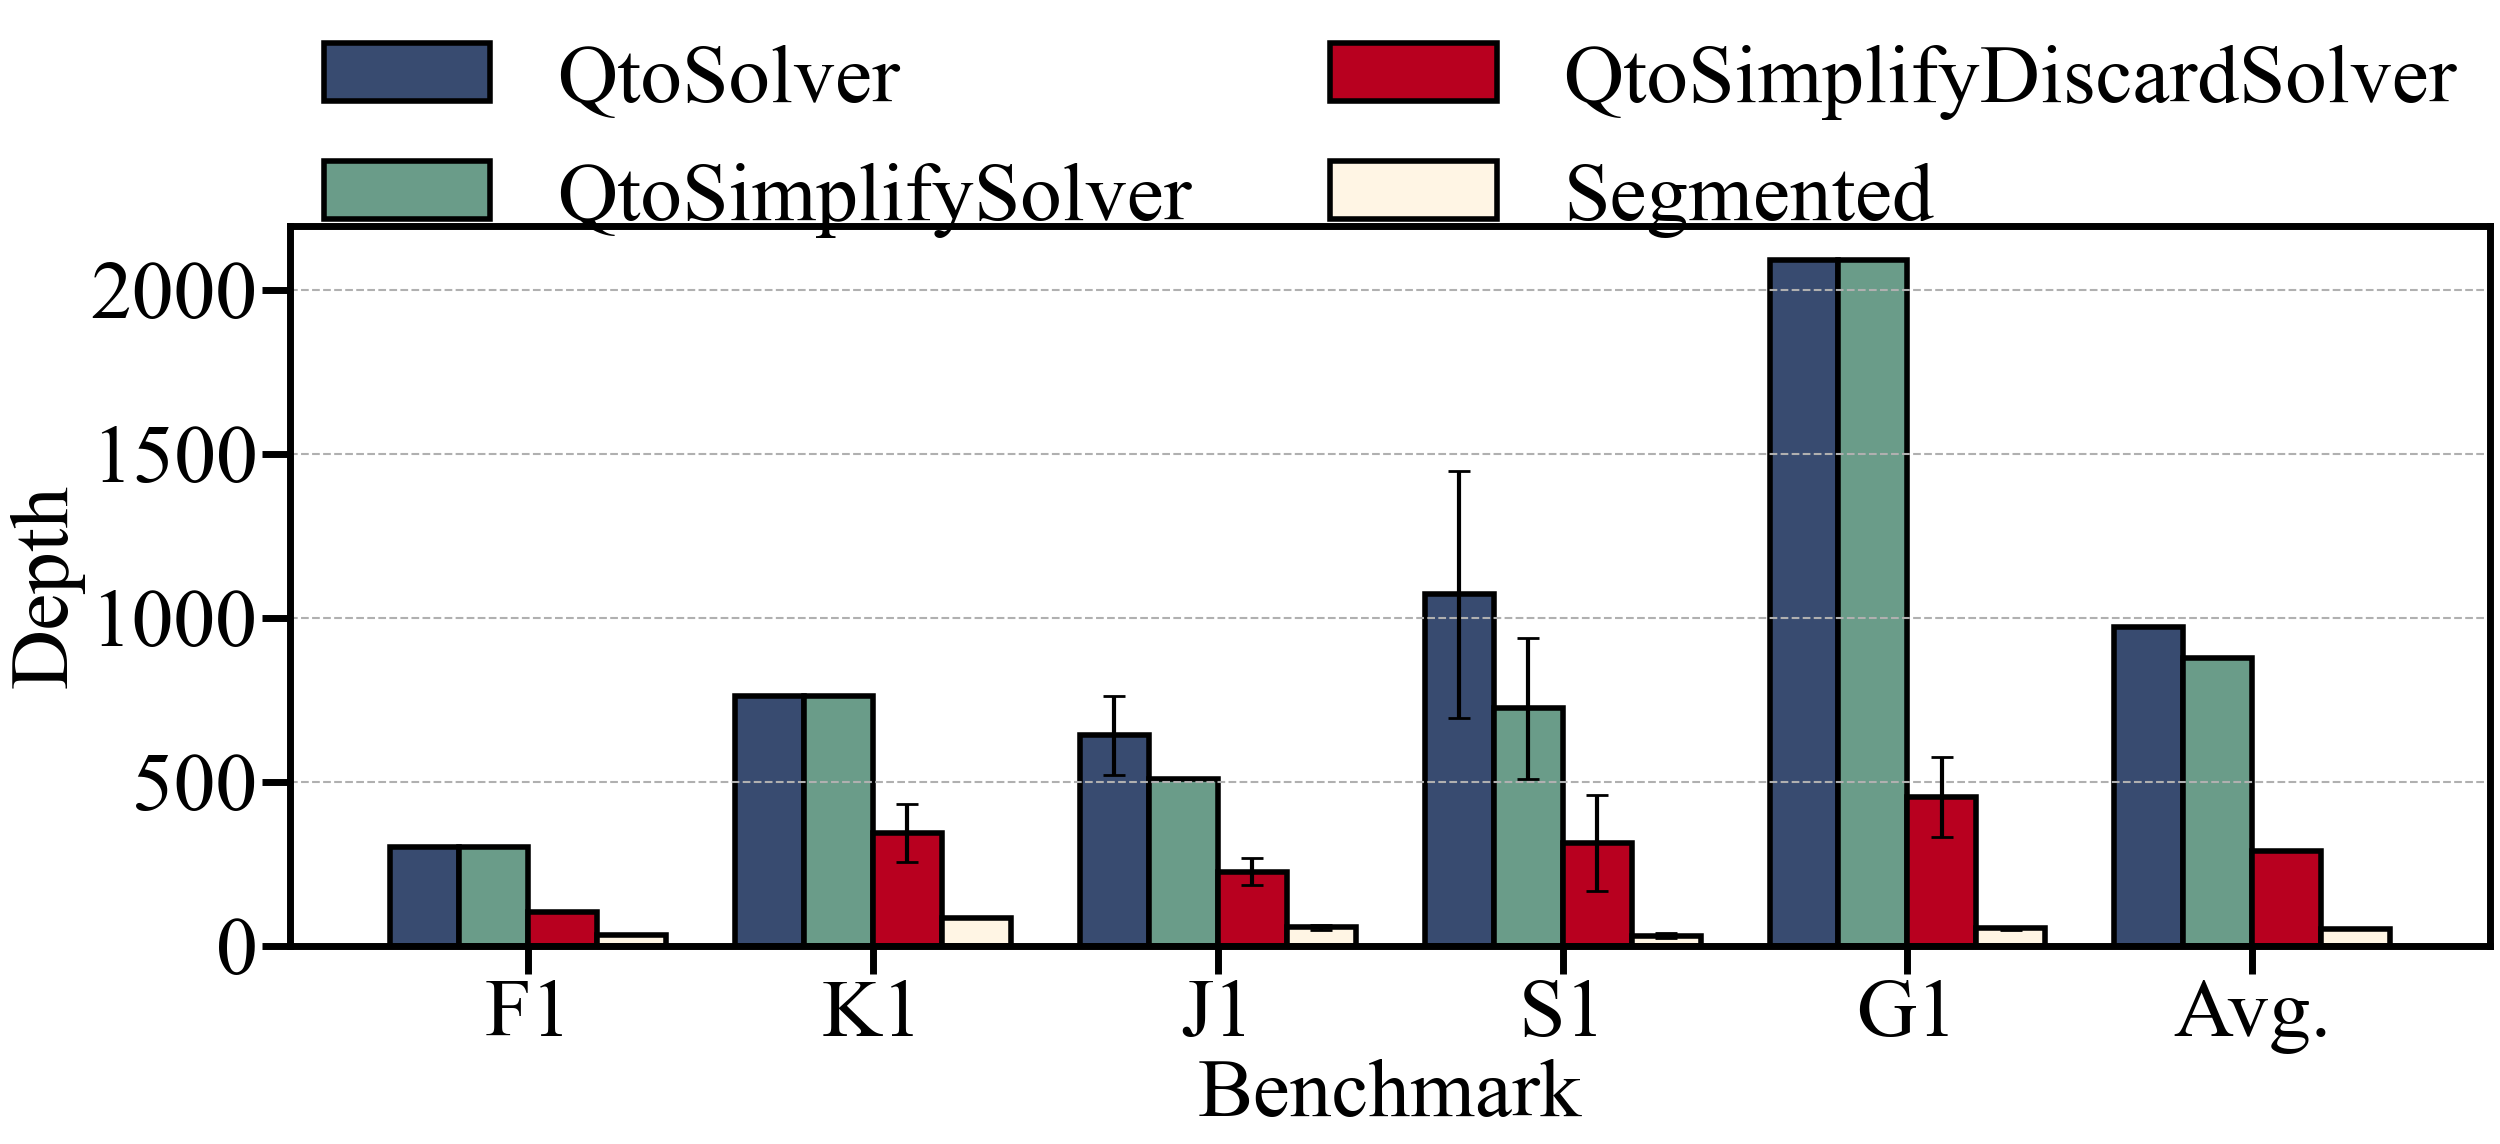

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Initialize the figure and axis settings
scale = 1
fig = plt.figure(figsize=(22*scale, 12*scale))
mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 60,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 5,
    'xtick.major.size': 20,
    'xtick.major.width': 5,
    'xtick.minor.size': 10,
    'xtick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    "lines.markersize" : 35,
    "lines.markeredgewidth" : 4,
    "markers.fillstyle" :  'full',
    'lines.markerfacecolor': '#f8d941',
    'lines.markeredgecolor': 'black',
})
ax = plt.axes((0, 0, 1, 0.6))  
error_params = dict(elinewidth=3,ecolor='black',capsize=8,capthick=2)
bar_width = 0.2
colors = ['#384B70','#6A9C89','#B8001F','#FFF5E4','#FFF']
hatchs = ['','','','','//']
for idx,method in enumerate(['QtoSolver','QtoSimplifySolver','QtoSimplifyDiscardSolver', 'Segmented']):
        data = grouped_df[grouped_df.method == method]
        x = np.arange(len(data.pkid)+1)
        y = data['depth']['mean'].to_list()
        y = y+ [np.mean(y)]
        print(y)
        err = data['depth']['std']
        err = err.to_list() + [0]
        ax.bar(x+idx*bar_width-bar_width,y,bar_width,color=colors[idx],
                yerr=err,error_kw=error_params,edgecolor="black",label=method,linewidth=4)
print('reduction rate:',(1-np.mean(grouped_df['depth'][grouped_df.method == 'QtoSimplifySolver']['mean'])/np.mean(grouped_df['depth'][grouped_df.method == 'QtoSolver']['mean']))*100,'%')

print('reduction rate:',(1-np.mean(grouped_df['depth'][grouped_df.method == 'QtoSimplifyDiscardSolver']['mean'])/np.mean(grouped_df['depth'][grouped_df.method == 'QtoSimplifySolver']['mean']))*100,'%')
print('reduction rate:',(1-np.mean(grouped_df['depth'][grouped_df.method == 'Segmented']['mean'])/np.mean(grouped_df['depth'][grouped_df.method == 'QtoSimplifyDiscardSolver']['mean']))*100,'%')
ax.grid(True, linestyle='--', linewidth=1.5, axis='y')
## set the xaix labels and title
plt.xticks(x+bar_width/2,['F1','K1','J1','S1','G1']+['Avg.'])
plt.xlabel('Benchmark')
plt.ylabel('Depth')
plt.yticks([0,500,1000, 1500,2000])
plt.legend(loc='upper left',ncol=2,frameon=False,bbox_to_anchor=(0,1.1,1,0.2),mode="expand",borderaxespad=0)
plt.savefig('depth.svg',bbox_inches='tight')


In [38]:

## 分组并把组作为索引
pivot_df = grouped_df.pivot(index =['pkid'], columns='method', values=values)

method_order = ['HeaSolver', 'PenaltySolver', 'ChocoSolver', 'QTOSimplifyDiscardSolver']
# method_order = ['QTOSolver', 'QTOSimplifySolver', 'QTOSimplifyDiscardSolver']
pivot_df = pivot_df.reindex(columns=pd.MultiIndex.from_product([values, method_order]))

pivot_df


ValueError: Shape of passed values is (35, 4), indices imply (35, 2)

In [ ]:
culled_depth_qtosimplify_discard = pivot_df['depth']['QTOSimplifyDiscardSolver']
num_params_qtosimplify_discard = pivot_df['num_params']['QTOSimplifyDiscardSolver']

# 计算新的列并将其添加到 `pivot_df`
pivot_df[('culled_depth_per_param', 'QTOSimplifyDiscardSolver')] = culled_depth_qtosimplify_discard / num_params_qtosimplify_discard
pivot_df

depth                                                    num_params  \
     HeaSolver PenaltySolver ChocoSolver QTOSimplifyDiscardSolver  HeaSolver   
pkid                                                                           
0         46.0         87.00      507.00               102.000000       90.0   
1         91.0        148.00     1888.00              1296.200000      225.0   
2        121.0        174.00     2688.00              3091.520000      315.0   
3        156.0        207.00     3848.00              3753.580000      420.0   
4         76.0        259.08     1878.65               454.400000      180.0   
5         91.0        309.90     1696.65               365.100000      225.0   
6        116.0        744.72     3207.48              1016.260000      300.0   
7        136.0        790.62     3515.32               986.380000      360.0   
8         56.0        174.51     1323.64               343.520000      120.0   
9         91.0        249.94     3532.82               698.000000      225.0   
10       106.0        284.84     4395.55              2897.360000      270.0   
11       121.0        324.31     5275.26              3336.710000      315.0   
12        51.0        110.00     1082.00               225.830000      105.0   
13        66.0        136.03     2039.00               455.630000      150.0   
14        86.0        169.50     3137.00              1437.740000      210.0   
15       106.0        194.18     4562.00              2011.490000      270.0   
16        61.0        220.07     1078.91               312.563830      135.0   
17        76.0        283.30     1345.86               581.757576      180.0   
18        96.0        390.24     1969.26              1192.731959      240.0   
19       116.0        480.80     2535.26              2250.134021      300.0   

                                                         \
     PenaltySolver ChocoSolver QTOSimplifyDiscardSolver   
pkid                                                      
0             10.0        10.0                 3.000000   
1             10.0        10.0                26.270000   
2             10.0        10.0                53.210000   
3             10.0        10.0                65.160000   
4             10.0        10.0                 8.440000   
5             10.0        10.0                 5.680000   
6             10.0        10.0                25.500000   
7             10.0        10.0                17.690000   
8             10.0        10.0                 4.030000   
9             10.0        10.0                 8.000000   
10            10.0        10.0                33.280000   
11            10.0        10.0                38.330000   
12            10.0        10.0                 4.040000   
13            10.0        10.0                 6.560000   
14            10.0        10.0                21.860000   
15            10.0        10.0                28.090000   
16            10.0        10.0                10.946809   
17            10.0        10.0                21.848485   
18            10.0        10.0                49.082474   
19            10.0        10.0               100.237113   

       culled_depth_per_param  
     QTOSimplifyDiscardSolver  
pkid                           
0                   34.000000  
1                   49.341454  
2                   58.100357  
3                   57.605586  
4                   53.838863  
5                   64.278169  
6                   39.853333  
7                   55.759186  
8                   85.240695  
9                   87.250000  
10                  87.060096  
11                  87.052178  
12                  55.898515  
13                  69.455793  
14                  65.770357  
15                  71.608758  
16                  28.552964  
17                  26.626907  
18                  24.300567  
19                  22.448113

In [ ]:
mean_values_per_column = pivot_df.mean()
print(mean_values_per_column)

depth                   HeaSolver                     93.250000
                        PenaltySolver                286.902000
                        ChocoSolver                 2575.283000
                        QTOSimplifyDiscardSolver    1340.445369
num_params              HeaSolver                    231.750000
                        PenaltySolver                 10.000000
                        ChocoSolver                   10.000000
                        QTOSimplifyDiscardSolver      26.562744
culled_depth_per_param  QTOSimplifyDiscardSolver      56.202095
dtype: float64


In [ ]:
# 定义格式化函数
import numpy as np
# def format_value(val):
#     if np.isnan(val):  # 如果是NaN值则返回空字符
#         return "NaN"
#     elif val < 100:  # 如果值小于100，保留3位有效数字
#         return f"{val:.2f}"
#     else:  # 如果值大于等于100，不保留小数点
#         return f"{val:.0f}"

# 按行遍历输出，每个值用 & 分隔
for row in pivot_df.itertuples(index=False):
    formatted_row = [f"{x:5.0f}" for x in row]
    print(" & ".join(formatted_row))

   46 &    87 &   507 &   102 &    90 &    10 &    10 &     3 &    34
   91 &   148 &  1888 &  1296 &   225 &    10 &    10 &    26 &    49
  121 &   174 &  2688 &  3092 &   315 &    10 &    10 &    53 &    58
  156 &   207 &  3848 &  3754 &   420 &    10 &    10 &    65 &    58
   76 &   259 &  1879 &   454 &   180 &    10 &    10 &     8 &    54
   91 &   310 &  1697 &   365 &   225 &    10 &    10 &     6 &    64
  116 &   745 &  3207 &  1016 &   300 &    10 &    10 &    26 &    40
  136 &   791 &  3515 &   986 &   360 &    10 &    10 &    18 &    56
   56 &   175 &  1324 &   344 &   120 &    10 &    10 &     4 &    85
   91 &   250 &  3533 &   698 &   225 &    10 &    10 &     8 &    87
  106 &   285 &  4396 &  2897 &   270 &    10 &    10 &    33 &    87
  121 &   324 &  5275 &  3337 &   315 &    10 &    10 &    38 &    87
   51 &   110 &  1082 &   226 &   105 &    10 &    10 &     4 &    56
   66 &   136 &  2039 &   456 &   150 &    10 &    10 &     7 &    69
   86 &   170 &  313

In [ ]:
# 选取 'depth' 下的所有列，并剔除 'NewSolver' 和 'QTOSimplifySolver'
depth_df = pivot_df['depth'].drop(columns=['NewSolver', 'QTOSimplifySolver'], errors='ignore')

# 选取 'culled_depth_per_param' 下的 'QTOSimplifyDiscardSolver' 列
qtosimplify_discard_df = pivot_df['culled_depth_per_param'][['QTOSimplifyDiscardSolver']]

# 合并处理后的 'depth' 列与 'QTOSimplifyDiscardSolver' 列，并指定后缀避免冲突
culled_depth_df = depth_df.join(qtosimplify_discard_df, lsuffix='_depth', rsuffix='_culled')

# 按行遍历输出值，每个值用 & 分隔
for row in culled_depth_df.itertuples(index=False):
    formatted_row = [f"{x:5.0f}" for x in row]
    print(" & ".join(formatted_row))


   46 &    87 &   507 &   102 &    34
   91 &   148 &  1888 &  1296 &    49
  121 &   174 &  2688 &  3092 &    58
  156 &   207 &  3848 &  3754 &    58
   76 &   259 &  1879 &   454 &    54
   91 &   310 &  1697 &   365 &    64
  116 &   745 &  3207 &  1016 &    40
  136 &   791 &  3515 &   986 &    56
   56 &   175 &  1324 &   344 &    85
   91 &   250 &  3533 &   698 &    87
  106 &   285 &  4396 &  2897 &    87
  121 &   324 &  5275 &  3337 &    87
   51 &   110 &  1082 &   226 &    56
   66 &   136 &  2039 &   456 &    69
   86 &   170 &  3137 &  1438 &    66
  106 &   194 &  4562 &  2011 &    72
   61 &   220 &  1079 &   313 &    29
   76 &   283 &  1346 &   582 &    27
   96 &   390 &  1969 &  1193 &    24
  116 &   481 &  2535 &  2250 &    22


In [ ]:
# 选取所需的列
depth_qto_discard = pivot_df['depth']['QTOSimplifyDiscardSolver']
depth_choco = pivot_df['depth']['ChocoSolver']
culled_depth_qto_discard = pivot_df['culled_depth_per_param']['QTOSimplifyDiscardSolver']
# 方法1：每行相除取平均
# depth 下 ChocoSolver / QTOSimplifyDiscardSolver 的倍数
row_wise_ratio_depth_choco_qto_discard = (depth_choco / depth_qto_discard).mean()

# culled_depth_per_param 下 ChocoSolver / QTOSimplifyDiscardSolver 的倍数
row_wise_ratio_culled_depth_choco_qto_discard = (depth_choco / culled_depth_qto_discard).mean()

# 方法2：整列取平均后相除
# depth 下 ChocoSolver / QTOSimplifyDiscardSolver 的整列平均的倍数
col_avg_ratio_depth_choco_qto_discard = depth_choco.mean() / depth_qto_discard.mean()

# culled_depth_per_param 下 ChocoSolver / QTOSimplifyDiscardSolver 的整列平均的倍数
col_avg_ratio_culled_depth_choco_qto_discard = depth_choco.mean() / culled_depth_qto_discard.mean()

# 输出结果
print(f"每行相除取平均 - depth 下 ChocoSolver / QTOSimplifyDiscardSolver 的倍数: {row_wise_ratio_depth_choco_qto_discard:.2f}")
# print(f"每行相除取平均 - depth 下 ChocoSolver / culled_depth_per_param 下 QTOSimplifyDiscardSolver 的倍数: {row_wise_ratio_culled_depth_choco_qto_discard:.2f}")
print(f"整列取平均后相除 - depth 下 ChocoSolver / QTOSimplifyDiscardSolver 的倍数: {col_avg_ratio_depth_choco_qto_discard:.2f}")
# print(f"整列取平均后相除 - depth 下 ChocoSolver / culled_depth_per_param 下 QTOSimplifyDiscardSolver 的倍数: {col_avg_ratio_culled_depth_choco_qto_discard:.2f}")


每行相除取平均 - depth 下 ChocoSolver / QTOSimplifyDiscardSolver 的倍数: 2.90
整列取平均后相除 - depth 下 ChocoSolver / QTOSimplifyDiscardSolver 的倍数: 1.92


In [ ]:
# 选择 `culled_depth` 和 `num_params` 中的 `QTOSimplifyDiscardSolver` 列

# 查看结果
pivot_df


depth                                                    num_params  \
     HeaSolver PenaltySolver ChocoSolver QTOSimplifyDiscardSolver  HeaSolver   
pkid                                                                           
0         46.0         87.00      507.00               102.000000       90.0   
1         91.0        148.00     1888.00              1296.200000      225.0   
2        121.0        174.00     2688.00              3091.520000      315.0   
3        156.0        207.00     3848.00              3753.580000      420.0   
4         76.0        259.08     1878.65               454.400000      180.0   
5         91.0        309.90     1696.65               365.100000      225.0   
6        116.0        744.72     3207.48              1016.260000      300.0   
7        136.0        790.62     3515.32               986.380000      360.0   
8         56.0        174.51     1323.64               343.520000      120.0   
9         91.0        249.94     3532.82               698.000000      225.0   
10       106.0        284.84     4395.55              2897.360000      270.0   
11       121.0        324.31     5275.26              3336.710000      315.0   
12        51.0        110.00     1082.00               225.830000      105.0   
13        66.0        136.03     2039.00               455.630000      150.0   
14        86.0        169.50     3137.00              1437.740000      210.0   
15       106.0        194.18     4562.00              2011.490000      270.0   
16        61.0        220.07     1078.91               312.563830      135.0   
17        76.0        283.30     1345.86               581.757576      180.0   
18        96.0        390.24     1969.26              1192.731959      240.0   
19       116.0        480.80     2535.26              2250.134021      300.0   

                                                         \
     PenaltySolver ChocoSolver QTOSimplifyDiscardSolver   
pkid                                                      
0             10.0        10.0                 3.000000   
1             10.0        10.0                26.270000   
2             10.0        10.0                53.210000   
3             10.0        10.0                65.160000   
4             10.0        10.0                 8.440000   
5             10.0        10.0                 5.680000   
6             10.0        10.0                25.500000   
7             10.0        10.0                17.690000   
8             10.0        10.0                 4.030000   
9             10.0        10.0                 8.000000   
10            10.0        10.0                33.280000   
11            10.0        10.0                38.330000   
12            10.0        10.0                 4.040000   
13            10.0        10.0                 6.560000   
14            10.0        10.0                21.860000   
15            10.0        10.0                28.090000   
16            10.0        10.0                10.946809   
17            10.0        10.0                21.848485   
18            10.0        10.0                49.082474   
19            10.0        10.0               100.237113   

       culled_depth_per_param  
     QTOSimplifyDiscardSolver  
pkid                           
0                   34.000000  
1                   49.341454  
2                   58.100357  
3                   57.605586  
4                   53.838863  
5                   64.278169  
6                   39.853333  
7                   55.759186  
8                   85.240695  
9                   87.250000  
10                  87.060096  
11                  87.052178  
12                  55.898515  
13                  69.455793  
14                  65.770357  
15                  71.608758  
16                  28.552964  
17                  26.626907  
18                  24.300567  
19                  22.448113